# Import Modules

In [1]:
# Uncomment the following line when running on Google Colab
# !pip install "autora[experimentalist-uncertainty]"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from autora.experimentalist.uncertainty import uncertainty_sample

# Define Meta-Space

We will here define X values of interest as well as a ground truth model to derive y values.

In [3]:
#Define meta-parameters
X = np.linspace(start=-3, stop=6, num=10).reshape(-1, 1)

#Define ground truth model
def ground_truth(xs):
    y = (xs ** 2.0)
    y[xs < 0] = 0
    return y

# Plot The Data

Let's plot the data to see what we are working with.

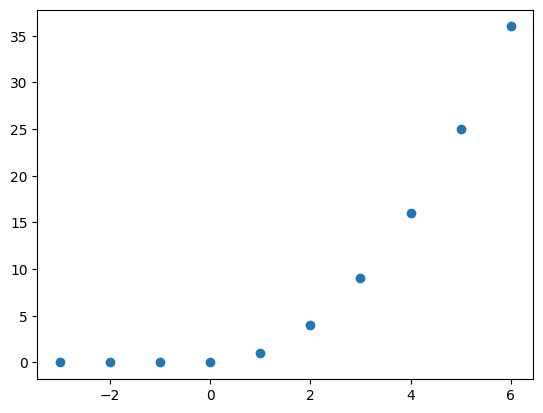

In [4]:
plt.plot(X, ground_truth(X), 'o')
plt.show()

# Define And Fit Theorist

Next, we initialize the theorist and then train it on the data. 

In [5]:
%%capture

#Initiate theorists
lr_theorist = LogisticRegression()

#Fit theorists
lr_theorist.fit(X,ground_truth(X))

# Plot Theorists On Data

We can then plot the theorist to see how well it recovered the data.

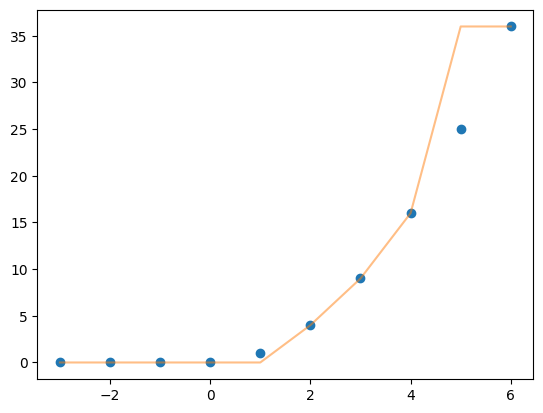

In [6]:
plt.plot(X, ground_truth(X), 'o')
plt.plot(X, lr_theorist.predict(X), alpha = .5)
plt.show()

# Run And Report Uncertainty Samples

Now we will get a proposal from the experimentalist as to which datapoints to investigate next. We will retrieve 5 new datapoints in this example.

In [7]:
sampler_proposal_lc = uncertainty_sample(X, lr_theorist, 5, measure ="least_confident")
sampler_proposal_marg = uncertainty_sample(X, lr_theorist, 5, measure ="margin")
sampler_proposal_ent = uncertainty_sample(X, lr_theorist, 5, measure ="entropy")

print('New datapoints with Least Confident metric:\n' + str(sampler_proposal_lc) + '\n')
print('New datapoints with Margin metric:\n' + str(sampler_proposal_marg) + '\n')
print('New datapoints with Entropy metric:\n' + str(sampler_proposal_ent))

New datapoints with Least Confident metric:
     0
0  3.0
1  2.0
2  4.0
3  5.0
4  1.0

New datapoints with Margin metric:
     0
0  4.0
1  2.0
2  3.0
3  5.0
4  1.0

New datapoints with Entropy metric:
     0
0  3.0
1  2.0
2  4.0
3  5.0
4  1.0


# Plot New Datapoints With Old

We can then plot our new datapoints with our previous ones to demonstrate our new dataset of investigation for then next cycle.

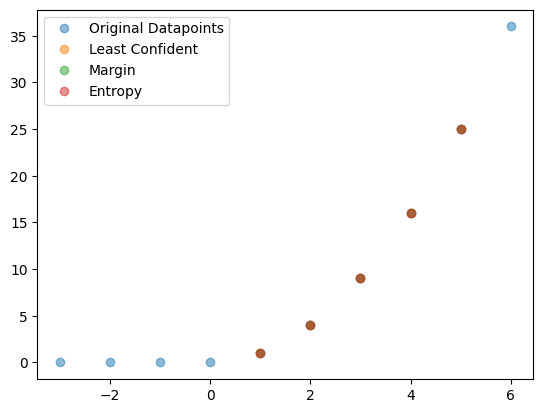

In [8]:
plt.plot(X, ground_truth(X), 'o', alpha = .5, label = 'Original Datapoints')
plt.plot(sampler_proposal_lc, ground_truth(sampler_proposal_lc), 'o', alpha = .5, label = 'Least Confident')
plt.plot(sampler_proposal_marg, ground_truth(sampler_proposal_marg), 'o', alpha = .5, label = 'Margin')
plt.plot(sampler_proposal_ent, ground_truth(sampler_proposal_ent), 'o', alpha = .5, label = 'Entropy')
plt.legend()
plt.show()